In [ ]:
import os, shutil

In [ ]:
# 데이터 셋 복사 및 확인
!cp -r '/content/drive/My Drive/dataset/cats_dogs'  '/content/'
!ls -ls '/content/cats_dogs'

total 833952
    88 -rw------- 1 root root     88903 Nov 11 03:24 sampleSubmission.csv
277660 -rw------- 1 root root 284321224 Nov 11 03:25 test1.zip
556204 -rw------- 1 root root 569546721 Nov 11 03:25 train.zip


In [ ]:
!rm -rf '/content/datasets/'
!unzip '/content/cats_dogs/test1.zip' -d '/content/datasets/' 
!unzip '/content/cats_dogs/train.zip' -d '/content/datasets/'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/train/dog.5499.jpg  
  inflating: /content/datasets/train/dog.55.jpg  
  inflating: /content/datasets/train/dog.550.jpg  
  inflating: /content/datasets/train/dog.5500.jpg  
  inflating: /content/datasets/train/dog.5501.jpg  
  inflating: /content/datasets/train/dog.5502.jpg  
  inflating: /content/datasets/train/dog.5503.jpg  
  inflating: /content/datasets/train/dog.5504.jpg  
  inflating: /content/datasets/train/dog.5505.jpg  
  inflating: /content/datasets/train/dog.5506.jpg  
  inflating: /content/datasets/train/dog.5507.jpg  
  inflating: /content/datasets/train/dog.5508.jpg  
  inflating: /content/datasets/train/dog.5509.jpg  
  inflating: /content/datasets/train/dog.551.jpg  
  inflating: /content/datasets/train/dog.5510.jpg  
  inflating: /content/datasets/train/dog.5511.jpg  
  inflating: /content/datasets/train/dog.5512.jpg  
  inflating: /content/datasets/train/dog.5513.jpg  
  inflating: /content/datasets/t

In [ ]:
!ls -al '/content/datasets/train' | head -5
!ls -l '/content/datasets/train' | grep ^- | wc -l
!ls -al '/content/datasets/test1' | head -5
!ls -l '/content/datasets/test1' | grep ^- | wc -l

total 609268
drwxr-xr-x 2 root root 774144 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Nov 11 03:25 ..
-rw-r--r-- 1 root root  12414 Sep 20  2013 cat.0.jpg
-rw-r--r-- 1 root root  21944 Sep 20  2013 cat.10000.jpg
25000
total 304296
drwxr-xr-x 2 root root 303104 Sep 20  2013 .
drwxr-xr-x 4 root root   4096 Nov 11 03:25 ..
-rw-r--r-- 1 root root  54902 Sep 20  2013 10000.jpg
-rw-r--r-- 1 root root  21671 Sep 20  2013 10001.jpg
12500


In [ ]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
ori_dataset_dir = './datasets/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'

In [ ]:
# 여러번 반복실행을 위해 디렉터리 삭제
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [ ]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [ ]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # 타깃 디렉터리
        target_size=(150, 150),  # 모든 이미지를 150 × 150 크기로 변경
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

val_generator = test_datagen.flow_from_directory(
        val_dir,  
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print("배치 데이터(입력) 크기", data_batch.shape)
  print("배치 레이블 크기", labels_batch.shape)
  break

배치 데이터(입력) 크기 (20, 150, 150, 3)
배치 레이블 크기 (20,)


In [ ]:
## 경로에 이미지 데이터의 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("학습용 데이터 : ", total_train)
print("검증용 데이터 : ", total_val)

학습용 데이터 :  2000
검증용 데이터 :  1000


In [ ]:
batch_size = 20

history = model.fit(train_generator, steps_per_epoch = total_train // batch_size, epochs=30, 
                    validation_data=val_generator, validation_steps=total_val // batch_size)

Epoch 1/30
100/100 [==============================] - 13s 116ms/step - loss: 0.6882 - acc: 0.5350 - val_loss: 0.6755 - val_acc: 0.5360
Epoch 2/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6612 - acc: 0.5985 - val_loss: 0.6408 - val_acc: 0.6420
Epoch 3/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6156 - acc: 0.6660 - val_loss: 0.6050 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5684 - acc: 0.7000 - val_loss: 0.5840 - val_acc: 0.7040
Epoch 5/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5389 - acc: 0.7220 - val_loss: 0.6929 - val_acc: 0.6290
Epoch 6/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5127 - acc: 0.7410 - val_loss: 0.5893 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 11s 110ms/step - loss: 0.4827 - acc: 0.7560 - val_loss: 0.5497 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
# 1
# baseline(150,150) 
# loss: 0.0530 - acc: 0.9850 - val_loss: 0.9480 - val_acc: 0.7200

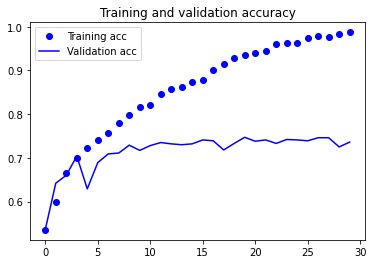

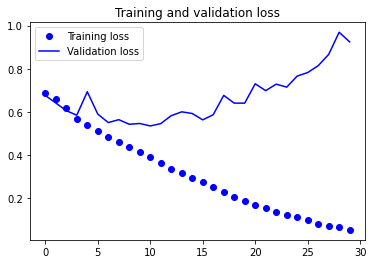

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 20, 20, 128)     

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # 타깃 디렉터리
        target_size=(180, 180),  # 모든 이미지를 150 × 150 크기로 변경
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

val_generator = test_datagen.flow_from_directory(
        val_dir,  
        target_size=(180, 180),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print("배치 데이터(입력) 크기", data_batch.shape)
  print("배치 레이블 크기", labels_batch.shape)
  break

배치 데이터(입력) 크기 (20, 180, 180, 3)
배치 레이블 크기 (20,)


In [ ]:
## 경로에 이미지 데이터의 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("학습용 데이터 : ", total_train)
print("검증용 데이터 : ", total_val)

학습용 데이터 :  2000
검증용 데이터 :  1000


In [ ]:
batch_size = 20

history = model.fit(train_generator, steps_per_epoch = total_train // batch_size, epochs=30, 
                    validation_data=val_generator, validation_steps=total_val // batch_size)

Epoch 1/30
100/100 [==============================] - 14s 127ms/step - loss: 0.6935 - acc: 0.5475 - val_loss: 0.7026 - val_acc: 0.5070
Epoch 2/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6528 - acc: 0.6110 - val_loss: 0.6268 - val_acc: 0.6490
Epoch 3/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5887 - acc: 0.6815 - val_loss: 0.7598 - val_acc: 0.5520
Epoch 4/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5528 - acc: 0.7145 - val_loss: 0.5825 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 12s 121ms/step - loss: 0.5252 - acc: 0.7405 - val_loss: 0.5774 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 12s 118ms/step - loss: 0.4971 - acc: 0.7500 - val_loss: 0.5811 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 12s 119ms/step - loss: 0.4650 - acc: 0.7675 - val_loss: 0.5675 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
model.save('cats_and_dogs_small_2_sizeup.h5')

In [ ]:
# 1
# baseline(150,150) 
# loss: 0.0530 - acc: 0.9850 - val_loss: 0.9480 - val_acc: 0.7200

# 2
# image size up(180,180)
# loss: 0.0278 - acc: 0.9930 - val_loss: 1.1462 - val_acc: 0.7330

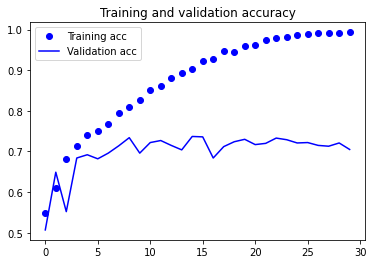

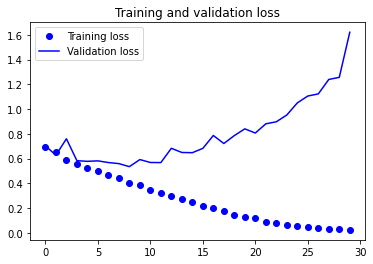

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 20, 20, 128)     

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # 타깃 디렉터리
        target_size=(180, 180),  # 모든 이미지를 150 × 150 크기로 변경
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

val_generator = test_datagen.flow_from_directory(
        val_dir,  
        target_size=(180, 180),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print("배치 데이터(입력) 크기", data_batch.shape)
  print("배치 레이블 크기", labels_batch.shape)
  break

배치 데이터(입력) 크기 (20, 180, 180, 3)
배치 레이블 크기 (20,)


In [ ]:
## 경로에 이미지 데이터의 개수 
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(val_cats_dir))
num_dogs_val = len(os.listdir(val_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("학습용 데이터 : ", total_train)
print("검증용 데이터 : ", total_val)

학습용 데이터 :  2000
검증용 데이터 :  1000


In [ ]:
batch_size = 20

history = model.fit(train_generator, steps_per_epoch = total_train // batch_size, epochs=50, 
                    validation_data=val_generator, validation_steps=total_val // batch_size)

Epoch 1/50
100/100 [==============================] - 13s 120ms/step - loss: 0.6931 - acc: 0.5380 - val_loss: 0.6854 - val_acc: 0.5270
Epoch 2/50
100/100 [==============================] - 12s 118ms/step - loss: 0.6451 - acc: 0.6385 - val_loss: 0.6274 - val_acc: 0.6450
Epoch 3/50
100/100 [==============================] - 12s 117ms/step - loss: 0.5969 - acc: 0.6835 - val_loss: 0.6278 - val_acc: 0.6500
Epoch 4/50
100/100 [==============================] - 12s 118ms/step - loss: 0.5447 - acc: 0.7245 - val_loss: 0.5883 - val_acc: 0.6890
Epoch 5/50
100/100 [==============================] - 12s 119ms/step - loss: 0.5085 - acc: 0.7500 - val_loss: 0.6148 - val_acc: 0.6730
Epoch 6/50
100/100 [==============================] - 12s 120ms/step - loss: 0.4677 - acc: 0.7810 - val_loss: 0.6326 - val_acc: 0.6660
Epoch 7/50
100/100 [==============================] - 12s 120ms/step - loss: 0.4320 - acc: 0.8050 - val_loss: 0.5631 - val_acc: 0.7110
Epoch 8/50
100/100 [==============================] - 1

In [ ]:
model.save('cats_and_dogs_small_3_epoch50.h5')

In [ ]:
# 1
# baseline(150,150) 
# loss: 0.0530 - acc: 0.9850 - val_loss: 0.9480 - val_acc: 0.7200

# 2
# image size up(180,180)
# loss: 0.0278 - acc: 0.9930 - val_loss: 1.1462 - val_acc: 0.7330

# 3
# epoch : 30 -> 50
# loss: 0.0056 - acc: 0.9980 - val_loss: 2.0065 - val_acc: 0.7140

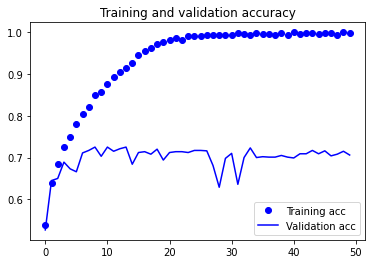

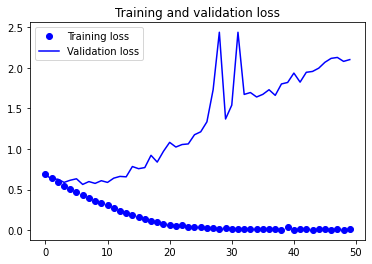

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 전이학습
* VGG16